In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [2]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Load pre-trained VGG16 model without the top layers (for transfer learning)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the initial layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Add custom classification head
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)  # Custom Dense Layer
x = layers.Dropout(0.5)(x)  # Dropout for regularization
x = layers.Dense(10, activation='softmax')(x)  # Output layer for 10 classes (CIFAR-10)

In [5]:

# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:

# Train the model on the CIFAR-10 dataset
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.3948 - loss: 1.7161 - val_accuracy: 0.5483 - val_loss: 1.2964
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5357 - loss: 1.3313 - val_accuracy: 0.5733 - val_loss: 1.2250
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5639 - loss: 1.2467 - val_accuracy: 0.5840 - val_loss: 1.1840
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5748 - loss: 1.2135 - val_accuracy: 0.5917 - val_loss: 1.1713
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5857 - loss: 1.1893 - val_accuracy: 0.5941 - val_loss: 1.1533
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5927 - loss: 1.1665 - val_accuracy: 0.6012 - val_loss: 1.1430
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5977 - loss: 1.1471 - val_accuracy: 0.5996 - val_loss: 1.1401
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6083 - loss: 1.1222 - 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: frog


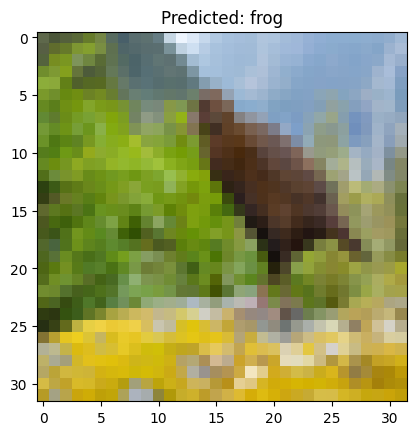

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to load, preprocess, and predict image from Google Drive
def predict_image_from_drive(img_path, model):
    # Open the image from Google Drive
    img = Image.open(img_path)

    # Resize the image to match CIFAR-10 input size (32x32)
    img = img.resize((32, 32))

    # Convert the image to numpy array
    img_array = np.array(img)

    # Check if the image is grayscale (2D) and convert it to RGB if needed
    if len(img_array.shape) == 2:  # If the image has only 2 dimensions (grayscale)
        print("Image is grayscale. Converting to RGB.")
        img_array = np.stack((img_array,) * 3, axis=-1)  # Convert to RGB by stacking

    # Normalize the image to [0, 1]
    img_array = img_array / 255.0

    # Ensure the image has 3 channels (RGB)
    if img_array.shape[-1] != 3:
        print(f"Image does not have 3 channels (RGB): {img_array.shape}")
        return

    # Expand dimensions to match the input shape (1, 32, 32, 3) for prediction
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class probabilities for the image
    predictions = model.predict(img_array)

    # Get the index of the highest probability class
    predicted_class_index = np.argmax(predictions)

    # Get the class name from the class_names list
    predicted_class_name = class_names[predicted_class_index]

    # Print and plot the result
    print(f"Predicted class: {predicted_class_name}")

    # Optionally display the image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}")
    plt.show()

# Example usage:
# Provide the trained model for prediction
# model = your_trained_model  # Make sure this is your model (e.g., VGG16 model fine-tuned)

img_path = '/content/drive/MyDrive/Colab Notebooks/documents/0A2A9595_Weka.jpg'  # Replace with the path to your image on Google Drive
predict_image_from_drive(img_path, model)
